In [4]:
import tensorflow as tf

import numpy as np

import matplotlib.pyplot as plt
import os

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("test_data")

Found 100013 files belonging to 50 classes.


In [2]:
import os
import numpy as np

def sample_dataset(dataset_path, sample_size_per_class):
  """Samples the dataset with a specified number of images per class.

  Args:
    dataset_path: Path to the dataset directory.
    sample_size_per_class: Number of images to sample per class.

  Returns:
    A list of image paths for the sampled dataset.
  """

  image_paths = []
  labels = []

  for class_dir in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_dir)
    image_files = os.listdir(class_path)
    sampled_images = np.random.choice(image_files, sample_size_per_class, replace=False)
    for image_file in sampled_images:
      image_path = os.path.join(class_path, image_file)
      image_paths.append(image_path)
      labels.append(class_dir)

  return image_paths, labels

# Example usage:
dataset_path = "test_data"
sample_size = 
sampled_image_paths, sampled_labels = sample_dataset(dataset_path, sample_size)

In [5]:




import shutil
import random

def create_sample_dataset(source_dir, target_dir, sample_size):
  """Creates a sample dataset from the source directory.

  Args:
    source_dir: Path to the source directory.
    target_dir: Path to the target directory.
    sample_size: Number of images to sample per state.
  """

  if not os.path.exists(target_dir):
    os.makedirs(target_dir)

  for state in os.listdir(source_dir):
    state_dir = os.path.join(source_dir, state)
    target_state_dir = os.path.join(target_dir, state)
    os.makedirs(target_state_dir, exist_ok=True)

    image_files = os.listdir(state_dir)
    sampled_images = random.sample(image_files, min(sample_size, len(image_files)))

    for image_file in sampled_images:
      src_path = os.path.join(state_dir, image_file)
      dst_path = os.path.join(target_state_dir, image_file)
      shutil.copy(src_path, dst_path)

# Example usage:
source_dir = "test_data"
target_dir = "sampled_data"
sample_size = 250  # Adjust sample size as needed
create_sample_dataset(source_dir, target_dir, sample_size)


Preprocessing

This discrepancy between the actual number of files (4993) and the calculated total samples (5024) is due to how TensorFlow handles batching and dataset cardinality and tf.data.experimental.cardinality function, it returns the number of batches in the dataset.
Let me explain:
Actual number of files: 4993
This is the true count of images in your dataset.
Calculated total samples: 5024
This comes from: 157 (dataset cardinality) * 32 (batch size) = 5024
The difference arises because of how TensorFlow creates batches and reports cardinality:
Batching: TensorFlow creates fixed-size batches (in this case, 32 images per batch). When the number of samples isn't perfectly divisible by the batch size, TensorFlow will add padding to the last batch to make it complete.
Cardinality: The dataset cardinality (157) represents the number of complete batches, including the padded last batch.
Here's what's happening:
4993 actual images
156 full batches of 32 images: 156 * 32 = 4992
1 last batch with 1 real image and 31 padded "images": 4992 + 32 = 5024
This padding in the last batch accounts for the difference between 4993 and 5024.

In [6]:
# Define constants
BATCH_SIZE = 64
IMG_SIZE = (224, 224)

# Load the full dataset
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "sampled_data",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=123
)

def check_dataset(ds, name):
    try:
        sample = next(iter(ds))
        print(f"{name} dataset contains data.")
        print(f"{name} sample shape:", sample[0].shape, sample[1].shape)
    except StopIteration:
        print(f"{name} dataset is empty.")

# Check the full dataset
print("Full dataset cardinality:", tf.data.experimental.cardinality(full_dataset).numpy())

# calculate split sizes
total_samples = tf.data.experimental.cardinality(full_dataset).numpy() * BATCH_SIZE
val_size = int(0.1 * total_samples)
test_size = int(0.1 * total_samples)
train_size = total_samples - val_size - test_size

print(f"Total samples: {total_samples}")
print(f"Train size: {train_size}")
print(f"Validation size: {val_size}")
print(f"Test size: {test_size}")

# create the splits
ds_val = full_dataset.take(val_size // BATCH_SIZE)
remaining = full_dataset.skip(val_size // BATCH_SIZE)
ds_tst = remaining.take(test_size // BATCH_SIZE)
ds_trn = remaining.skip(test_size // BATCH_SIZE)

# Check the cardinality of each split
print("Training dataset cardinality:", tf.data.experimental.cardinality(ds_trn).numpy())
print("Validation dataset cardinality:", tf.data.experimental.cardinality(ds_val).numpy())
print("Test dataset cardinality:", tf.data.experimental.cardinality(ds_tst).numpy())

# Try to access a batch from the training dataset
check_dataset(ds_trn, "Training")
check_dataset(ds_val, "Validation")
check_dataset(ds_tst, "Test")
# dataset info
ds_info = {
    "num_classes": len(full_dataset.class_names),
    "class_names": full_dataset.class_names,
    "total_samples": total_samples,
    "train_samples": train_size,
    "test_samples": test_size,
    "val_samples": val_size
}

print("\nDataset Info:")
for key, value in ds_info.items():
    print(f"{key}: {value}")

Found 12496 files belonging to 50 classes.
Full dataset cardinality: 196
Total samples: 12544
Train size: 10036
Validation size: 1254
Test size: 1254
Training dataset cardinality: 158
Validation dataset cardinality: 19
Test dataset cardinality: 19
Training dataset contains data.
Training sample shape: (64, 224, 224, 3) (64,)
Validation dataset contains data.
Validation sample shape: (64, 224, 224, 3) (64,)
Test dataset contains data.
Test sample shape: (64, 224, 224, 3) (64,)

Dataset Info:
num_classes: 50
class_names: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Isl

In [7]:
# Normalize the datasets
normalization_layer = tf.keras.layers.Rescaling(1./255)

ds_trn = ds_trn.map(lambda x, y: (normalization_layer(x), y))
ds_val = ds_val.map(lambda x, y: (normalization_layer(x), y))
ds_tst = ds_tst.map(lambda x, y: (normalization_layer(x), y))

# Prefetch the datasets for performance improvement
AUTOTUNE = tf.data.AUTOTUNE

ds_trn = ds_trn.cache().prefetch(buffer_size=AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size=AUTOTUNE)
ds_tst = ds_tst.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
#Ensuring Correct Data Types
ds_trn = ds_trn.map(lambda x, y: (tf.cast(x, tf.float32), y))
ds_val = ds_val.map(lambda x, y: (tf.cast(x, tf.float32), y))
ds_tst = ds_tst.map(lambda x, y: (tf.cast(x, tf.float32), y))

In [9]:
#One-Hot Encoding of Labels
num_classes = len(full_dataset.class_names)
ds_trn = ds_trn.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
ds_val = ds_val.map(lambda x, y: (x, tf.one_hot(y, num_classes)))
ds_tst = ds_tst.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

In [11]:
#Checking for Class Imbalance
class_counts = {}
for images, labels in full_dataset:
    for label in labels:
        class_name = full_dataset.class_names[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

print("Class distribution:", class_counts)

Class distribution: {'Indiana': 250, 'Arkansas': 250, 'New York': 250, 'Idaho': 250, 'Rhode Island': 250, 'Utah': 250, 'Oklahoma': 250, 'Vermont': 250, 'Texas': 249, 'Maryland': 250, 'Alabama': 250, 'Illinois': 250, 'Oregon': 250, 'South Carolina': 250, 'Michigan': 250, 'Mississippi': 250, 'Virginia': 250, 'Alaska': 250, 'Colorado': 249, 'Delaware': 250, 'California': 250, 'North Dakota': 250, 'Hawaii': 250, 'Missouri': 249, 'Florida': 250, 'Nevada': 250, 'Arizona': 250, 'Maine': 250, 'Iowa': 250, 'Tennessee': 250, 'Georgia': 250, 'Wisconsin': 249, 'Ohio': 250, 'Montana': 250, 'West Virginia': 250, 'New Hampshire': 250, 'North Carolina': 250, 'Louisiana': 250, 'Nebraska': 250, 'Kansas': 250, 'New Mexico': 250, 'Massachusetts': 250, 'Pennsylvania': 250, 'Washington': 250, 'Kentucky': 250, 'Wyoming': 250, 'South Dakota': 250, 'New Jersey': 250, 'Minnesota': 250, 'Connecticut': 250}


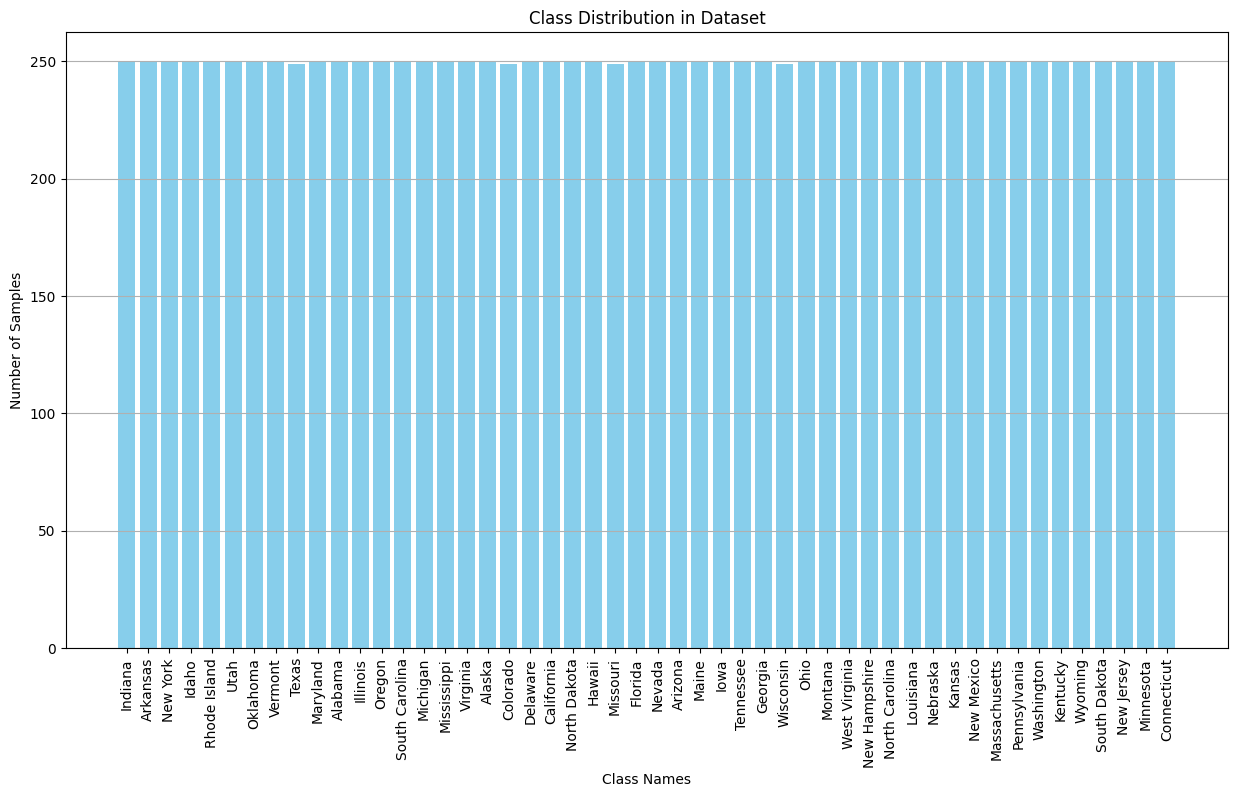

In [12]:
# Generate a bar plot for class distribution
plt.figure(figsize=(15, 8))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class Names')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Dataset')
plt.xticks(rotation=90)  # Rotate class names for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

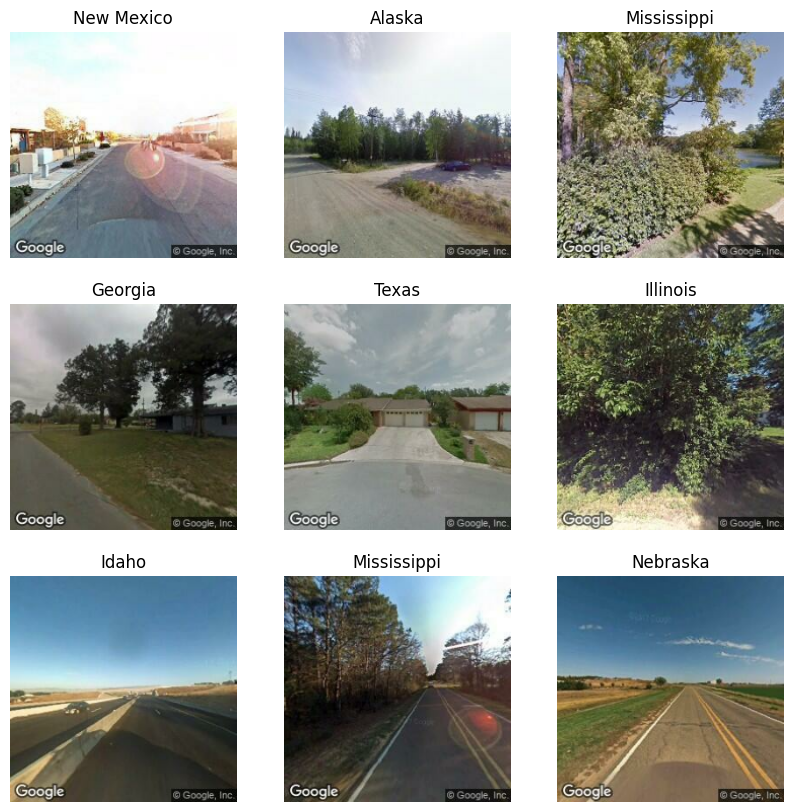

In [13]:


plt.figure(figsize=(10, 10))
for images, labels in ds_trn.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        # Rescale the image from [0,1] to [0,255]
        img = images[i].numpy()
        img = (img * 255).astype(np.uint8)
        plt.imshow(img)
       # Convert one-hot encoded label back to class index
        label_index = np.argmax(labels[i].numpy())
        
        # Use the class index to get the class name
        plt.title(full_dataset.class_names[label_index])
        plt.axis("off")
plt.show()

Summary of preprocessing:

1)Resizing:
Standardize all images to the same dimensions (e.g., 224x224 pixels).
This ensures consistent input size for the neural network.

2)Batch Preparation:
Organize images into batches for efficient processing during training.

3)Splitting the Dataset:
Divide your data into training, validation, and test sets.
Typical split ratios are 70-15-15 or 80-10-10.

4)Normalization:
Scale pixel values to a range of [0, 1] or [-1, 1].
This helps in faster convergence during training.

5)Data Type Conversion:
Ensure images and labels are in the correct data type (e.g., float32 for images, int for labels).

6)Encoding Labels:
Convert class names to numerical labels (e.g., using one-hot encoding).


7)Handling Class Imbalance:
Check for and address any significant imbalances in the number of samples per class.
Techniques include oversampling, undersampling, or using class weights.

Model Building


In [14]:
from tensorflow.keras import layers, models

In [15]:
# DEFINE NETWORK MODEL
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(300,activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(50, activation='softmax')  # Assuming 50 classes for 50 states
])

model.summary() 

c:\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │     5,529,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       154,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50)             │        25,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,950,494 (22.70 MB)

 Trainable params: 5,950,494 (22.70 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# COMPILE NETWORK MODEL
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(
    ds_trn,
    validation_data=ds_val,
    epochs=10,  # Adjust the number of epochs as needed
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)# Early stopping is used to prevent overfitting.
    ]
)

Epoch 1/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 390s 2s/step - accuracy: 0.0278 - loss: 3.8838 - val_accuracy: 0.0370 - val_loss: 3.8234
Epoch 2/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.0335 - loss: 3.8111 - val_accuracy: 0.0370 - val_loss: 3.7926
Epoch 3/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.0493 - loss: 3.7560 - val_accuracy: 0.0428 - val_loss: 3.8015
Epoch 4/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.0643 - loss: 3.6948 - val_accuracy: 0.0444 - val_loss: 3.7525
Epoch 5/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.0839 - loss: 3.6052 - val_accuracy: 0.0354 - val_loss: 3.8845
Epoch 6/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.1111 - loss: 3.4766 - val_accuracy: 0.0444 - val_loss: 3.8848
Epoch 7/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 315s 2s/step - accuracy: 0.1457 - loss: 3.2880 - val_accuracy: 0.0510 - val_loss: 4.0813
Epoch 8/10
158/158 ━━━━━━━━━━━━━━━━━━━━ 314s 2s/step - accuracy: 0.1949 - loss: 3.0427 - val_accu

In [19]:
# EVALUATE TEST SET PERFORMANCE# EVALUATE TEST SET PERFORMANCE
test_loss, test_acc = model.evaluate(ds_tst, verbose=2)
print(f"\nTest accuracy: {test_acc}")

19/19 - 10s - 506ms/step - accuracy: 0.0584 - loss: 3.7319

Test accuracy: 0.058388158679008484


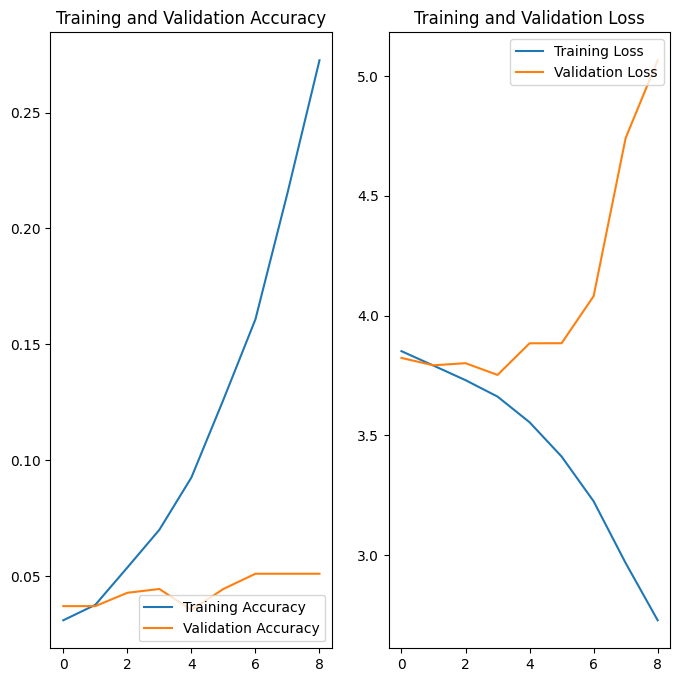

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()